In [1]:
# imports
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

warnings.filterwarnings('ignore')

C:\Users\sunny\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\sunny\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df=pd.read_csv('data/Loan_Default.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
df_LTV=df[df['LTV'].notna()]

In [5]:
df_test0=df_LTV[df_LTV['Status']==0]
df_test1=df_LTV[df_LTV['Status']==1]

In [6]:
df_test0.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,112029.000000,112029.0,1.120290e+05,112029.000000,112029.000000,108875.000000,112003.000000,1.120290e+05,104118.000000,112029.000000,112029.000000,112029.0,104218.000000
mean,99181.618081,2019.0,3.349912e+05,4.044926,0.441658,3227.328554,335.145755,5.056061e+05,7204.047139,699.523847,72.064757,0.0,37.369380
std,42924.705658,0.0,1.749167e+05,0.561359,0.513047,3251.673989,58.823301,3.427845e+05,6201.390985,115.674824,41.768899,0.0,10.027206
min,24892.000000,2019.0,2.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,2.072943,0.0,5.000000
25%,61964.000000,2019.0,2.065000e+05,3.625000,0.076000,584.390000,360.000000,2.880000e+05,4020.000000,599.000000,59.970817,0.0,31.000000
50%,99221.000000,2019.0,3.065000e+05,3.990000,0.390400,2600.000000,360.000000,4.280000e+05,6000.000000,699.000000,74.504405,0.0,38.000000
75%,136304.000000,2019.0,4.465000e+05,4.375000,0.775400,4815.315000,360.000000,6.380000e+05,8760.000000,800.000000,85.201149,0.0,44.000000
max,173559.000000,2019.0,3.006500e+06,8.000000,3.357000,60000.000000,360.000000,9.268000e+06,377220.000000,900.000000,7831.250000,0.0,61.000000


In [7]:
df_test1.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,21543.000000,21543.0,2.154300e+04,200.000000,0.0,153.000000,21540.000000,2.154300e+04,20319.000000,21543.000000,21543.000000,21543.0,20329.000000
mean,99317.005710,2019.0,3.118326e+05,4.350500,NaN,1565.237974,335.797957,4.577860e+05,6035.352133,700.713410,76.291468,1.0,39.597324
std,42738.697717,0.0,2.127446e+05,0.495546,NaN,2299.820513,56.200810,4.362550e+05,7824.958132,116.926926,28.580217,0.0,12.716828
min,24890.000000,2019.0,1.650000e+04,3.125000,NaN,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,1.0,5.000000
25%,62631.500000,2019.0,1.665000e+05,3.990000,NaN,0.000000,360.000000,2.280000e+05,2880.000000,599.000000,64.273172,1.0,32.000000
50%,98758.000000,2019.0,2.665000e+05,4.312500,NaN,687.850000,360.000000,3.480000e+05,4620.000000,700.000000,79.362416,1.0,42.000000
75%,136346.500000,2019.0,4.065000e+05,4.750000,NaN,2310.750000,360.000000,5.580000e+05,7260.000000,803.000000,90.948276,1.0,49.000000
max,173551.000000,2019.0,3.576500e+06,5.500000,NaN,15584.000000,360.000000,1.650800e+07,578580.000000,900.000000,2956.250000,1.0,61.000000


In [8]:

df_negamort=df_LTV[df['Neg_ammortization'].notna()]
df_income=df_negamort[df_negamort['income'].notna()]
df_preapprove=df_income[df_income['approv_in_adv'].notna()]
df_preapprove['Upfront_charges']=df_preapprove['Upfront_charges'].fillna(0)
df_preapprove['rate_of_interest']=df_preapprove['rate_of_interest'].fillna(0)
df_preapprove['Interest_rate_spread']=df_preapprove['rate_of_interest'].fillna(0)
df_preapprove.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123545 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         123545 non-null  int64  
 1   year                       123545 non-null  int64  
 2   loan_limit                 120664 non-null  object 
 3   Gender                     123545 non-null  object 
 4   approv_in_adv              123545 non-null  object 
 5   loan_type                  123545 non-null  object 
 6   loan_purpose               123436 non-null  object 
 7   Credit_Worthiness          123545 non-null  object 
 8   open_credit                123545 non-null  object 
 9   business_or_commercial     123545 non-null  object 
 10  loan_amount                123545 non-null  int64  
 11  rate_of_interest           123545 non-null  float64
 12  Interest_rate_spread       123545 non-null  float64
 13  Upfront_charges            12

In [ ]:
df_c

# df_int=df_LTV[df['Interest_rate_spread'].notna()]

<AxesSubplot:xlabel='loan_limit', ylabel='Count'>

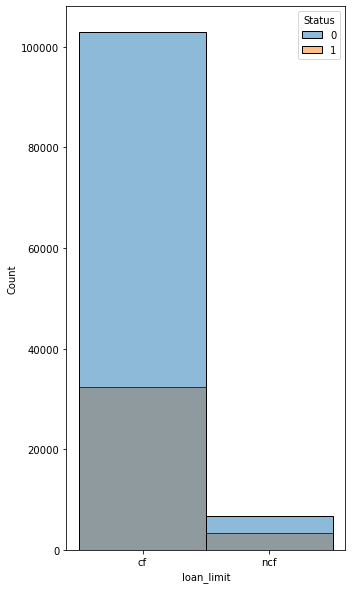

In [9]:
df_test_loan_limit=df[df['loan_limit'].notna()]
df_test_loan_limit['Status']=df_test_loan_limit['Status'].astype('category')
f,ax=plt.subplots(figsize=(5,10))
sns.histplot(ax=ax,data=df_test_loan_limit,x='loan_limit',hue='Status')

<AxesSubplot:xlabel='loan_purpose', ylabel='Count'>

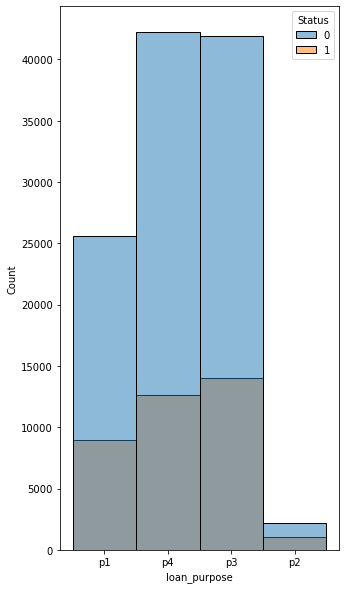

In [10]:
df_test_loan_purpose=df[df['loan_purpose'].notna()]
df_test_loan_purpose['Status']=df_test_loan_purpose['Status'].astype('category')
f,ax=plt.subplots(figsize=(5,10))
sns.histplot(ax=ax,data=df_test_loan_purpose,x='loan_purpose',hue='Status')

In [11]:
df_limit=df_preapprove[df_preapprove['loan_limit'].notna()]
df_term=df_limit[df_limit['term'].notna()]
df_cleaned=df_term[df_term['loan_purpose'].notna()]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120526 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         120526 non-null  int64  
 1   year                       120526 non-null  int64  
 2   loan_limit                 120526 non-null  object 
 3   Gender                     120526 non-null  object 
 4   approv_in_adv              120526 non-null  object 
 5   loan_type                  120526 non-null  object 
 6   loan_purpose               120526 non-null  object 
 7   Credit_Worthiness          120526 non-null  object 
 8   open_credit                120526 non-null  object 
 9   business_or_commercial     120526 non-null  object 
 10  loan_amount                120526 non-null  int64  
 11  rate_of_interest           120526 non-null  float64
 12  Interest_rate_spread       120526 non-null  float64
 13  Upfront_charges            12

In [12]:
df_cleaned['Status'].value_counts()

0    100879
1     19647
Name: Status, dtype: int64

In [13]:
df_cleaned['construction_type'].value_counts()

sb    120496
mh        30
Name: construction_type, dtype: int64

In [14]:
df_cleaned['year'].value_counts()

2019    120526
Name: year, dtype: int64

In [15]:
df_cleaned['occupancy_type'].value_counts()

pr    111519
ir      6318
sr      2689
Name: occupancy_type, dtype: int64

In [16]:
df_cleaned['lump_sum_payment'].value_counts()

not_lpsm    118461
lpsm          2065
Name: lump_sum_payment, dtype: int64

In [17]:
df_cleaned['interest_only'].value_counts()

not_int     114952
int_only      5574
Name: interest_only, dtype: int64

In [18]:
df_cleaned['loan_type'].value_counts()

type1    98871
type2    14313
type3     7342
Name: loan_type, dtype: int64

In [19]:
df_cleaned['business_or_commercial'].value_counts()

nob/c    106213
b/c       14313
Name: business_or_commercial, dtype: int64

In [20]:
df_cleaned['Secured_by'].value_counts()

home    120496
land        30
Name: Secured_by, dtype: int64

In [21]:
df_cleaned['construction_type'].value_counts()

sb    120496
mh        30
Name: construction_type, dtype: int64

In [22]:
df_cleaned['co-applicant_credit_type'].value_counts()

CIB    67862
EXP    52664
Name: co-applicant_credit_type, dtype: int64

In [23]:
df_cleaned['credit_type'].value_counts()

CIB     44541
CRIF    40318
EXP     35665
EQUI        2
Name: credit_type, dtype: int64

In [24]:
df_cleaned['submission_of_application'].value_counts()

to_inst     77283
not_inst    43243
Name: submission_of_application, dtype: int64

In [25]:
df_cleaned['Security_Type'].value_counts()

direct      120496
Indriect        30
Name: Security_Type, dtype: int64

In [26]:
columns_to_drop=(['ID','year','Secured_by','construction_type','credit_type','Security_Type'])

In [27]:
df_cleaned.drop(columns=columns_to_drop,inplace=True)

In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120526 entries, 0 to 148669
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 120526 non-null  object 
 1   Gender                     120526 non-null  object 
 2   approv_in_adv              120526 non-null  object 
 3   loan_type                  120526 non-null  object 
 4   loan_purpose               120526 non-null  object 
 5   Credit_Worthiness          120526 non-null  object 
 6   open_credit                120526 non-null  object 
 7   business_or_commercial     120526 non-null  object 
 8   loan_amount                120526 non-null  int64  
 9   rate_of_interest           120526 non-null  float64
 10  Interest_rate_spread       120526 non-null  float64
 11  Upfront_charges            120526 non-null  float64
 12  term                       120526 non-null  float64
 13  Neg_ammortization          12

In [29]:
df_cleaned.to_csv('data/cleaned.csv')

KeyboardInterrupt: 

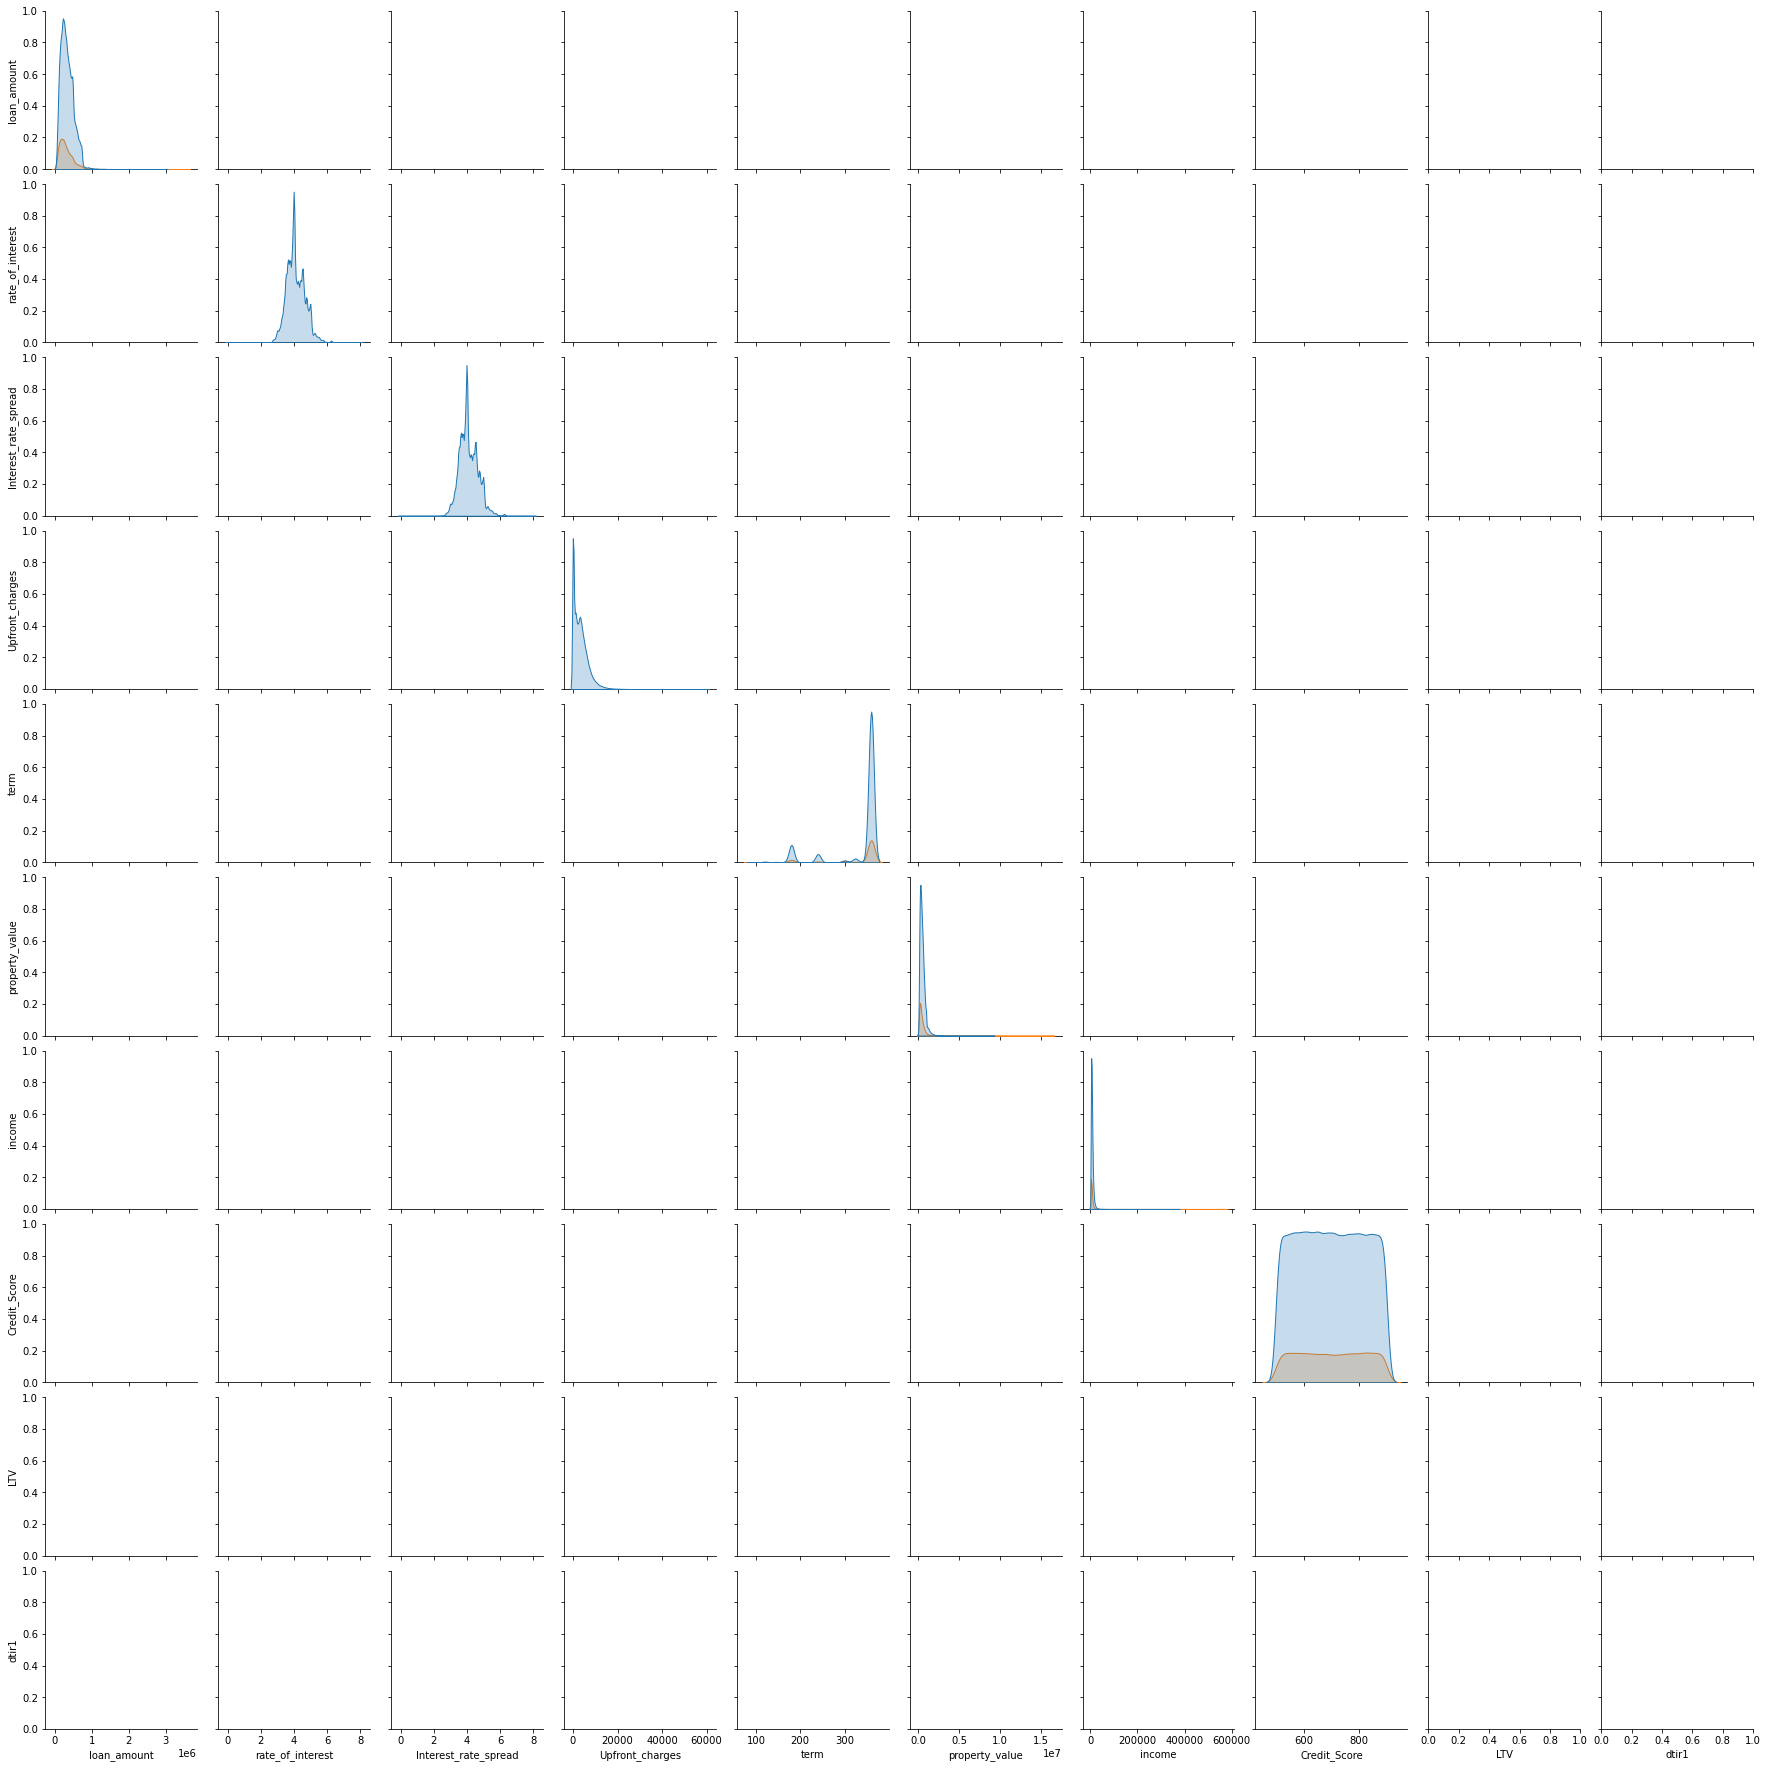

In [30]:
sns.pairplot(df_cleaned, hue = 'Status')